# Student_exam_oriented_exercise_3

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/jdariasl/OTBD/main/content/init.py
import init; init.init(force_download=False)

In [ ]:
#!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

In [1]:
import numpy as np
from local.lib.data import load_data
import scipy as sc
import matplotlib.pyplot as plt

In [ ]:
#!pip install cvxpy

In [2]:
import cvxpy as cp

## Exercise

- Algorithm: Gradient and accelerated gradient
- Problem: Ridge Regression

$\underset{{\bf{w}}}{\min}f({\bf{w}})=\underset{{\bf{w}}}{\min}\left(\frac{1}{2}\left\Vert {\bf{X}}{\bf{w}}-{\bf{y}}\right\Vert _{2}^{2}+\frac{\lambda}{2}\left\Vert {\bf{w}}\right\Vert _{2}^{2}\right)$

- Data: Boston housing dataset
    - 13 features: crime rate, proportion of non-retail business, $\textrm{N}\textrm{O}_{2}$ concentration, number of rooms per house...
        - We use only 12 features: $\bf{X}$ is a $400\times12$ matrix containing 400 dataset entries.
    - Target: to predict the price of the houses (in thousands of \$).
        -  Thus, ${\bf{y}}$ is a $400\times1$ vector containing the regression target (i.e., the price)
        
For the accelerated gradient, you can use the equations discussed on the slides (Chapeter 3) or alternatively:

$${\bf{v}}_{k+1} = {\bf{w}}_{k} - \eta \nabla f({\bf{w}}_{k})$$
$${\bf{w}}_{k+1} = {\bf{v}}_{k+1} + \gamma ({\bf{v}}_{k+1} - {\bf{v}}_{k})$$

They both converge to the optimum and perform similar but have a different starting point which conditiones their behavior during some part of the iterative process.

In [3]:
#load data
X,y = load_data("regression", 1)
n,d = X.shape
#data normalisation
X = sc.stats.zscore(X)
y = sc.stats.zscore(y)

In [4]:
# Constant parameters
lamb = 0.01 #regularisation parameter
Niter=500   # Number of iterations for each algorithm

In [5]:
#cvx_solver
def solver_cvx(X,Y,lamb,objective_fn):
    n_columns = X.shape[1]
    w = cp.Variable(n_columns)
    lambd = cp.Parameter(nonneg=True)
    lambd.value = lamb
    problem = cp.Problem(
        cp.Minimize(objective_fn(X, Y, w, lambd))
    )
    problem.solve()
    return w.value

In [6]:
# Get the optimum value for comparison purposes 
#===================================
loss_fn = lambda X, Y, w: (1/2)*cp.pnorm(X @ w - Y, p=2)**2
reg_L2 = lambda w: cp.pnorm(w, p=2)**2
loss_LS_L2 = lambda X, Y, w, lambd: loss_fn(X, Y, w) + (lambd/2) * reg_L2(w)

# Solution using CVX
w_L2_cvx=solver_cvx(X,y,lamb,loss_LS_L2);

w = cp.Variable(w_L2_cvx.shape[0])
w.value = w_L2_cvx
f_cvx=loss_LS_L2(X,y,w_L2_cvx,lamb).value

print(f'The loss function f at the optimum takes the value {f_cvx}')

The loss function f at the optimum takes the value 54.67754570364904


In [7]:
# Step size computation

# Complete the code to estimate the learning rate (step size) 
# according to the formula for strong second order convexity functions
eta = ...

In [19]:
#Function that estimates the loss for several w at once.
f = lambda X, Y, w, lambd: (1/2)*np.sum((X@w - np.kron(Y.reshape(-1,1),np.ones((1,Niter+1))))**2, axis=0) + (lambd/2)*np.sum(w**2,axis=0)


# Gradient Descent
w_grad=np.zeros((d,Niter+1))
for k in range(Niter):
    #Complete the code including the updating formula. Keep the w values for all the iteration
    w_grad[:,k+1] = ...

f_grad=f(X,y,w_grad,lamb)

In [55]:
# Accelerated gradient
w_grad_acc = np.zeros((d,Niter+1))
v_grad_acc = np.zeros((d,Niter+1))

# Complete the code to estimate the momentum coefficient 
# according to the formula for strong second order convexity functions
gamma=...

# Accelerated gradient
for k in range(Niter):
    #Complete the code including the updating formula. Keep the w values for all the iteration
    
    w_grad_acc[:, k+1] = ...

f_grad_acc=f(X,y,w_grad_acc,lamb)

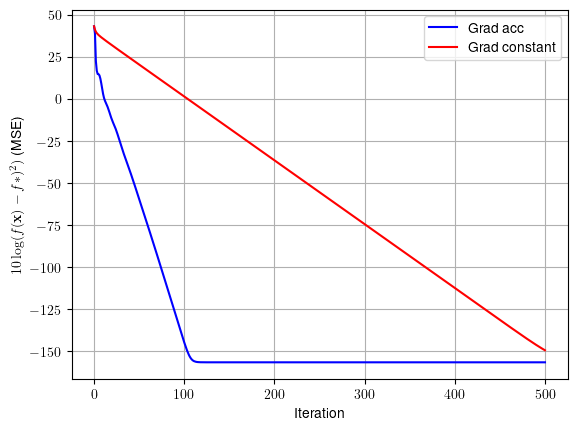

In [54]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
t = range(Niter+1)
plt.plot(t, 10*np.log10((f_grad_acc-f_cvx)**2+np.finfo(float).eps), color = 'b',label = 'Grad acc')
plt.plot(t, 10*np.log10((f_grad-f_cvx)**2+np.finfo(float).eps), color = 'r', label = 'Grad constant')
plt.grid()
plt.legend()
plt.xlabel('Iteration')
plt.ylabel(r'$10\log(f({\bf{x}})-f*)^2)$ (MSE)')
plt.show()

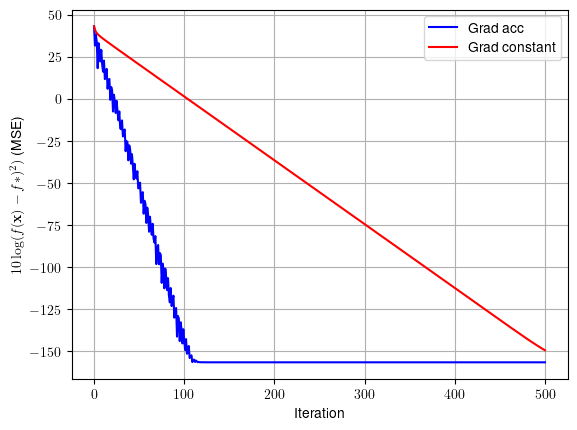